In [2]:
import calendar
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm
import numpy as np
import os

In [3]:
PATH_SOURCE = "/home/jbassham/jack/data/weddell/1992_2020"
PATH_DEST = PATH_SOURCE
PATH_DEST_PLOTS = os.path.join(PATH_SOURCE,'plots_error')

In [4]:
fnam = "motion_ppv4_latlon_sh_1992_2020.npz"

data = np.load(os.path.join(PATH_SOURCE, fnam), allow_pickle=True)
ui = data['u'] # zonal ice velocity
vi = data['v'] # meridional ice velocity
error = data['error']
lat = data['lat']
lon = data['lon']
time = data['time']

In [5]:
fnam = 'con_nimbus7_latlon_sh_1992_2020.npz'
data = np.load(os.path.join(PATH_SOURCE, fnam), allow_pickle=True)
ic = data['ic']

In [ ]:
def misfit(u_true, u_pred, v_true, v_pred):
    
    misfit = np.sqrt((u_true - u_pred)**2 + (v_true - v_pred)**2)
    
    return misfit

In [6]:
# Mask ice concentration

ic_raw = np.round(ic * 250)

# Mask 
# 251 pole hole
# 252 unused data
# 253 coastline
# 254 
ic = np.where((ic_raw == 251) | (ic_raw == 252) | (ic_raw == 253) | (ic_raw == 254), np.nan, ic)

# Filter points with ice error greater than 999 and 0 concentration ice motion
# Create mask
mask = (ic == 0) | (np.isnan(ic)) | (error >= 999) | (error <= -999)

# Mask points
ui = np.where(mask, np.nan, ui) 
uv = np.where(mask, np.nan, vi)

In [7]:
# # Shift present day parameters forward one day
# ui_today = ui[1:,:,:]
# vi_today = vi[1:,:,:]
# uw_today = uw[1:,:,:]
# vw_today = vw[1:,:,:]
# time_today = time[1:]
# error_today = error[1:,:,:]
# # error_today = error_9999[1:,:,:]

# # Remove last day from previous day parameters
# ui_yest = ui[:-1:,:,:]
# vi_yest = vi[:-1:,:,:]
# ic_yest = ic[:-1,:,:]
# time_yest = time[:-1]
# error_yest = error[:-1,:,:]
# # error_yest = error_9999[:-1,:,:]

# print("Days shifted")

In [8]:
def norm(data):
    
    data_mean = np.nanmean(data)
    data_std = np.nanstd(data)
    data_norm = (data - data_mean)/data_std

    return data_norm

In [9]:
# Normalize components

ui_norm = norm(ui)
vi_norm = norm(vi)

In [10]:
fnam = 'predictions_cnn_250109_2000_1992_2020.npz'

data = np.load(os.path.join(PATH_SOURCE, fnam), allow_pickle=True)
cnn_u_pred = data['u_pred']
cnn_v_pred = data['v_pred']
cnn_u_true = data['u_true']
cnn_v_true = data['v_true']

In [11]:
fnam = 'predictions_lr_1992_2020.npz'

data = np.load(os.path.join(PATH_SOURCE, fnam), allow_pickle=True)
lr_u_pred = data['u_pred']
lr_v_pred = data['v_pred']
lr_u_true = data['u_true']
lr_v_true = data['v_true']

In [11]:
print(np.shape(time))
print(np.shape(cnn_u_pred))

(10593,)
(2119, 81, 522)


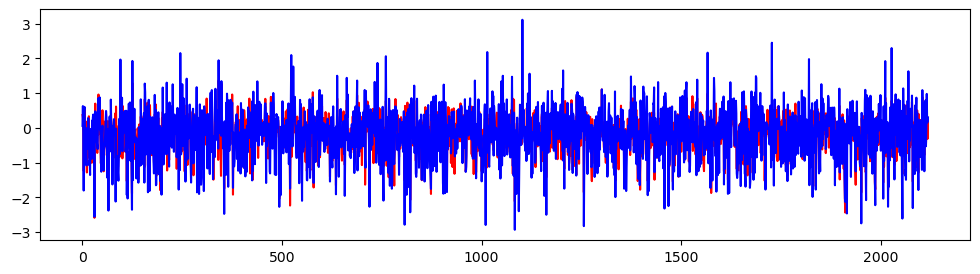

In [17]:
plt.figure(figsize = (12,3))
plt.plot(cnn_u_pred[:,40,200], 'r')
plt.plot(cnn_u_true[:,40,200], 'b')
plt.show()

In [14]:
misfit_cnn = np.sqrt((cnn_u_true - cnn_u_pred)**2 + (cnn_v_true - cnn_v_pred)**2)

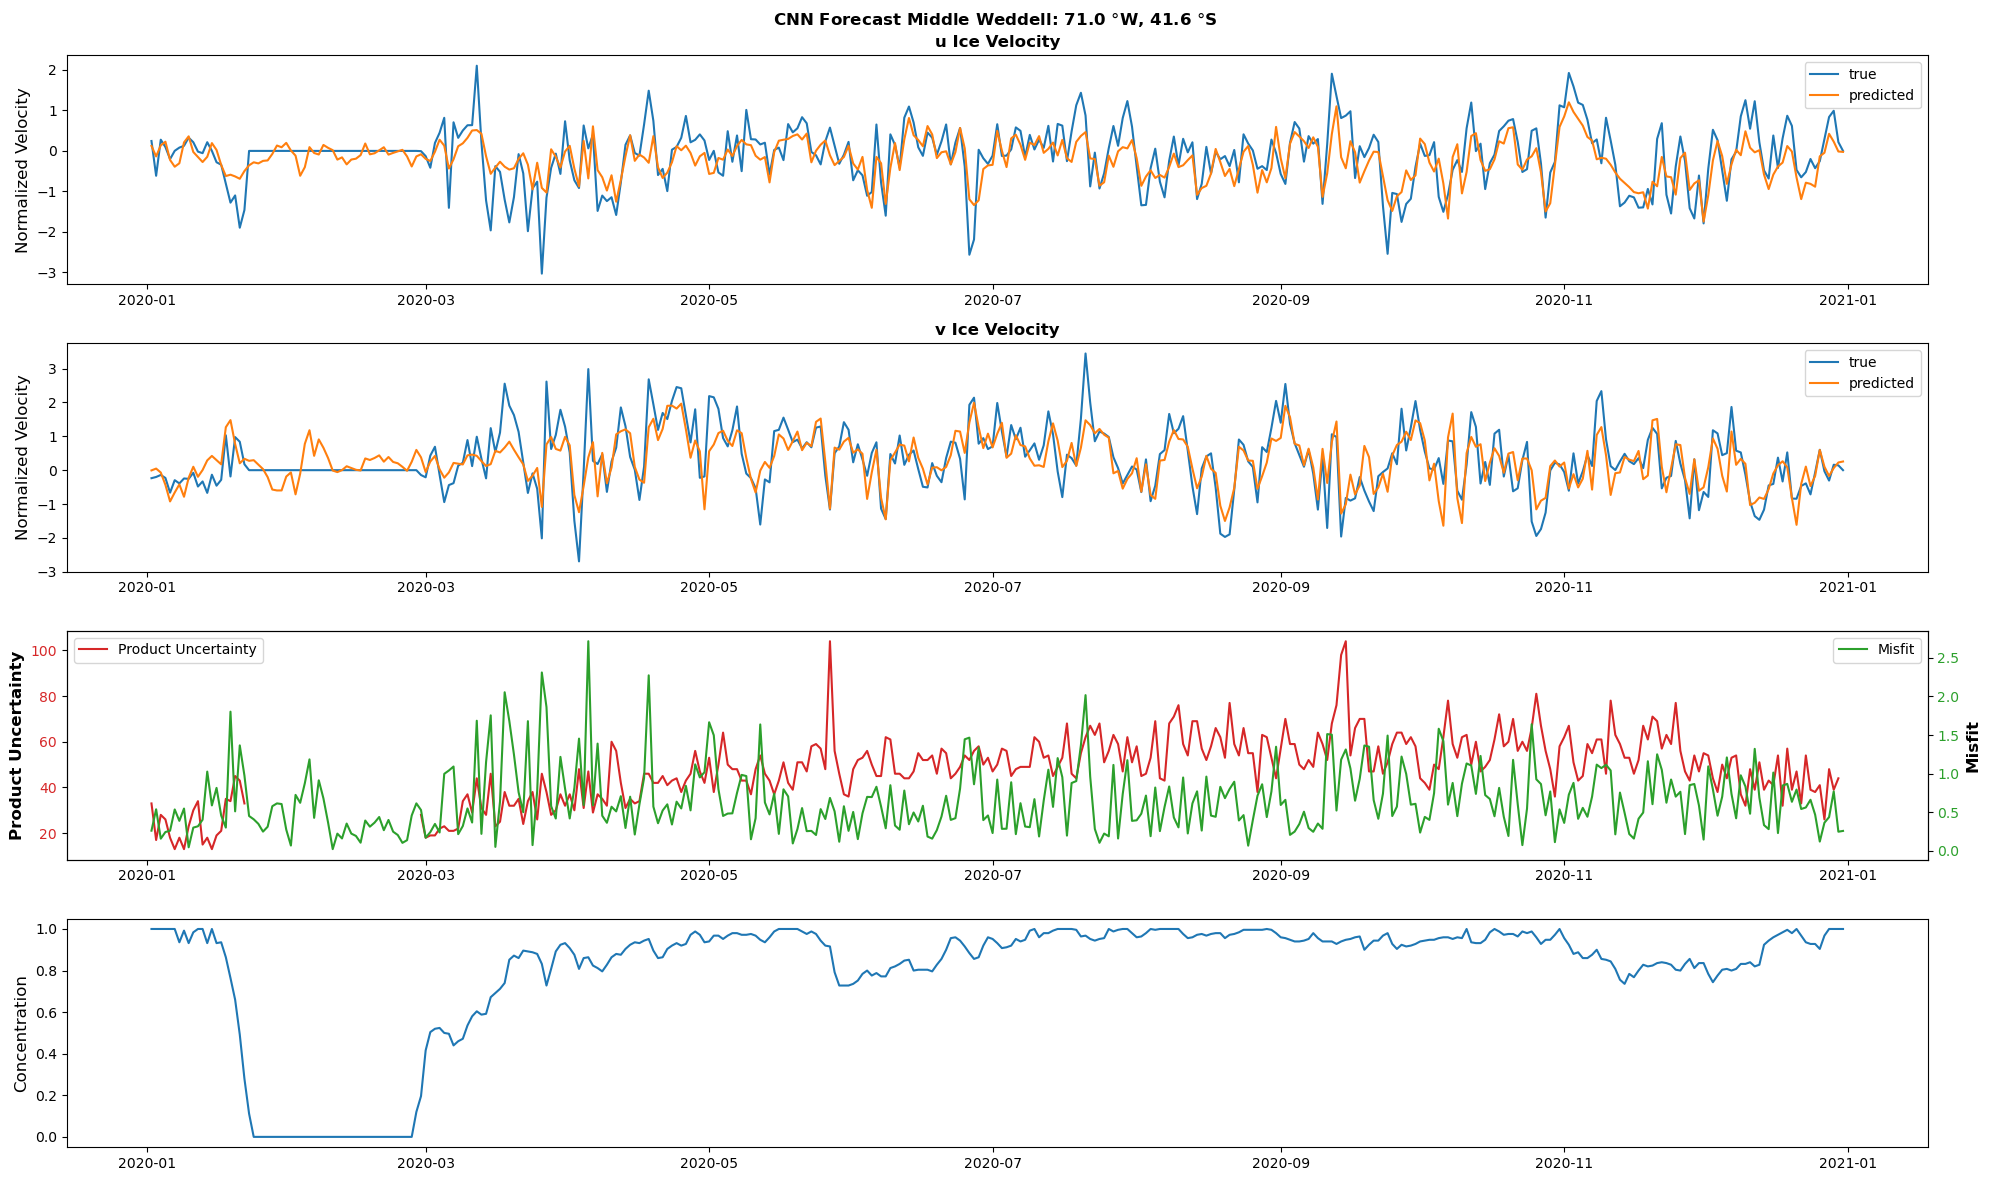

In [25]:
y = 40
x = 200

region = 'Middle Weddell'

if lat[y] < 0:
    lat_str = r'$\degree $W'
else:
    lat_str = r'$\degree $E'
    
lon_str = r'$ \degree $S'

fig, axs = plt.subplots(nrows = 4, ncols = 1, figsize = (20, 12))

plt1 = axs[0].plot(time[-365:],cnn_u_true[-365:,y,x], label = 'true')
plt2 = axs[0].plot(time[-365:],cnn_u_pred[-365:,y,x], label = 'predicted')
axs[0].legend()
axs[0].set_title('u Ice Velocity', fontweight = 'bold')
axs[0].set_ylabel("Normalized Velocity", fontsize = '12')

plt3 = axs[1].plot(time[-365:],cnn_v_true[-365:,y,x], label = 'true')
plt4 = axs[1].plot(time[-365:],cnn_v_pred[-365:,y,x], label = 'predicted')
axs[1].legend()
axs[1].set_title('v Ice Velocity', fontweight = 'bold')
axs[1].set_ylabel("Normalized Velocity", fontsize = '12')


plt5 = axs[2].plot(time[-365:],error[-365:,y,x], label = 'Product Uncertainty', color = 'tab:red')
axs[2].set_ylabel('Product Uncertainty', fontsize = '12', fontweight = 'bold')
axs[2].tick_params(axis='y', labelcolor = 'tab:red')
axs[2].legend(loc = 'upper left')

twin = axs[2].twinx()
plt5 = twin.plot(time[-365:],misfit_cnn[-365:,y,x], label = 'Misfit', color = 'tab:green')
twin.set_ylabel('Misfit', fontsize = '12', fontweight = 'bold')
twin.legend(loc = 'upper right')
twin.tick_params(axis='y', labelcolor = 'tab:green')

plt6 = axs[3].plot(time[-365:], ic[-365:,y,x], label = 'Concentration')
axs[3].set_ylabel('Concentration', fontsize = '12')



fig.suptitle(f'CNN Forecast {region}: {np.abs(lat[y]):.1f} {lat_str}, {np.abs(lon[x]):.1f} {lon_str}', fontweight = 'bold')
fig.tight_layout()

plt.show()

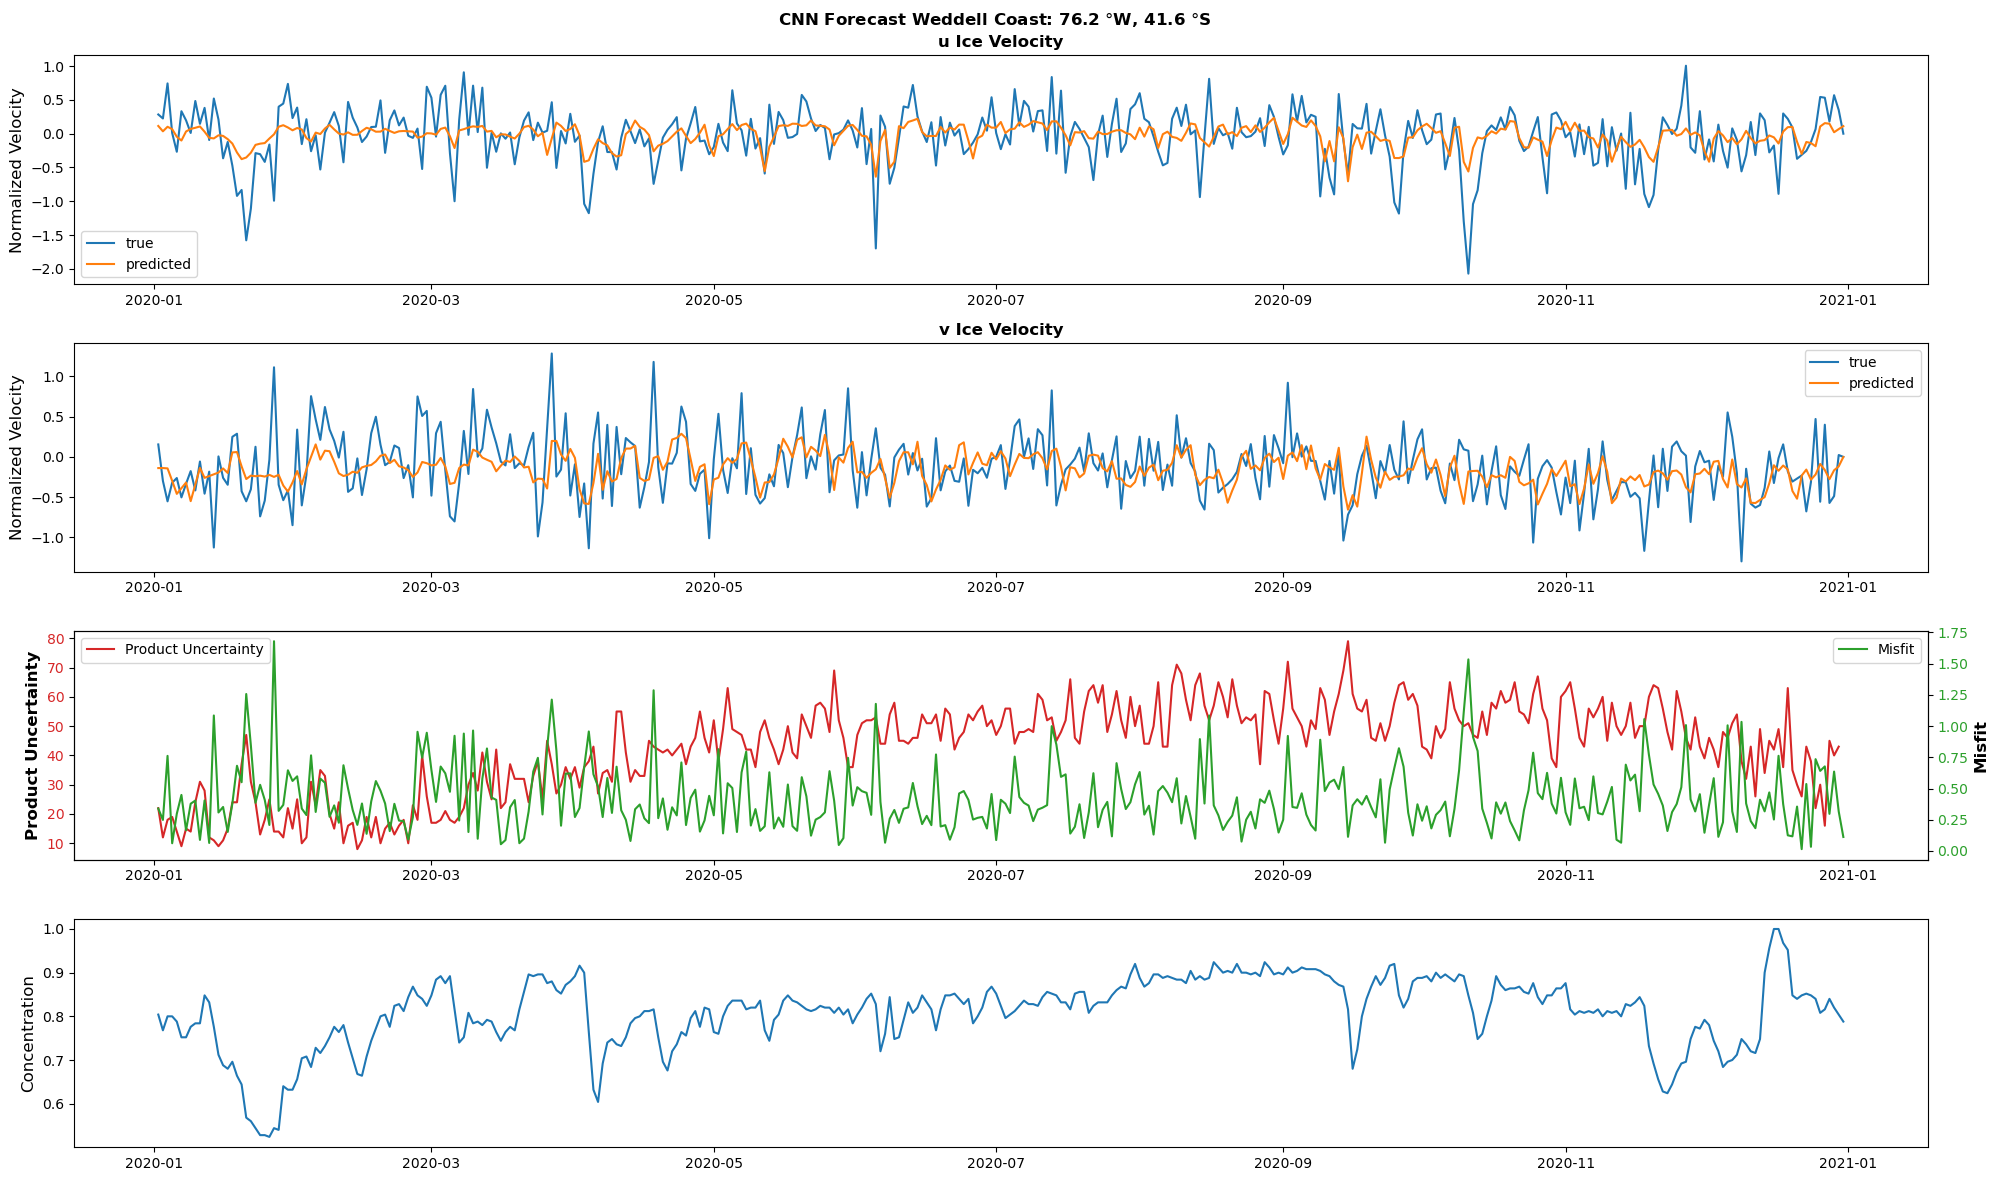

In [26]:
y = 17
x = 200
region = 'Weddell Coast'

if lat[y] < 0:
    lat_str = r'$\degree $W'
else:
    lat_str = r'$\degree $E'
    
lon_str = r'$ \degree $S'

fig, axs = plt.subplots(nrows = 4, ncols = 1, figsize = (20, 12))

plt1 = axs[0].plot(time[-365:],cnn_u_true[-365:,y,x], label = 'true')
plt2 = axs[0].plot(time[-365:],cnn_u_pred[-365:,y,x], label = 'predicted')
axs[0].legend()
axs[0].set_title('u Ice Velocity', fontweight = 'bold')
axs[0].set_ylabel("Normalized Velocity", fontsize = '12')

plt3 = axs[1].plot(time[-365:],cnn_v_true[-365:,y,x], label = 'true')
plt4 = axs[1].plot(time[-365:],cnn_v_pred[-365:,y,x], label = 'predicted')
axs[1].legend()
axs[1].set_title('v Ice Velocity', fontweight = 'bold')
axs[1].set_ylabel("Normalized Velocity", fontsize = '12')


plt5 = axs[2].plot(time[-365:],error[-365:,y,x], label = 'Product Uncertainty', color = 'tab:red')
axs[2].set_ylabel('Product Uncertainty', fontsize = '12', fontweight = 'bold')
axs[2].tick_params(axis='y', labelcolor = 'tab:red')
axs[2].legend(loc = 'upper left')

twin = axs[2].twinx()
plt5 = twin.plot(time[-365:],misfit_cnn[-365:,y,x], label = 'Misfit', color = 'tab:green')
twin.set_ylabel('Misfit', fontsize = '12', fontweight = 'bold')
twin.legend(loc = 'upper right')
twin.tick_params(axis='y', labelcolor = 'tab:green')

plt6 = axs[3].plot(time[-365:], ic[-365:,y,x], label = 'Concentration')
axs[3].set_ylabel('Concentration', fontsize = '12')



fig.suptitle(f'CNN Forecast {region}: {np.abs(lat[y]):.1f} {lat_str}, {np.abs(lon[x]):.1f} {lon_str}', fontweight = 'bold')
fig.tight_layout()

plt.show()

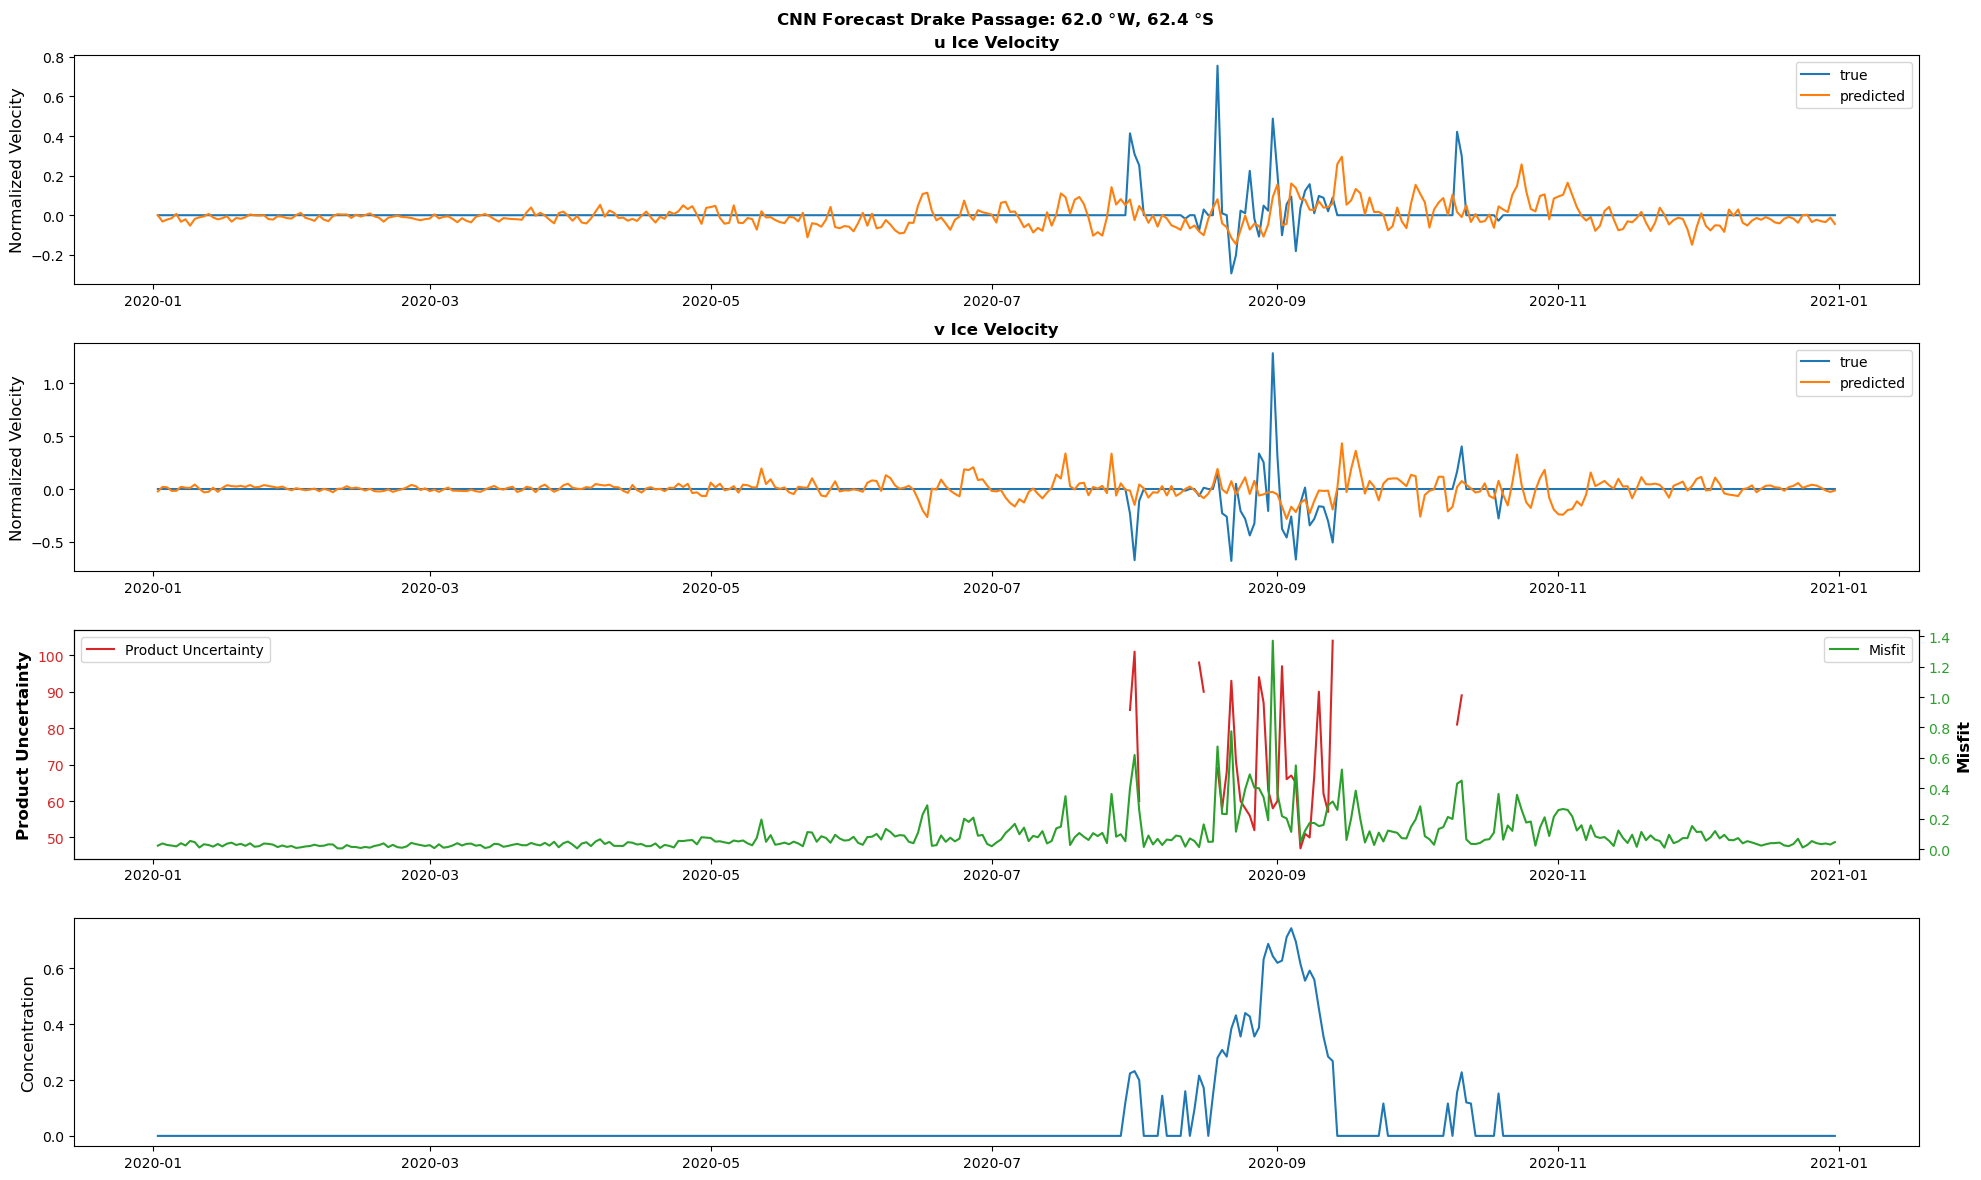

In [27]:
y = 80
x = 170
region = 'Drake Passage'

if lat[y] < 0:
    lat_str = r'$\degree $W'
else:
    lat_str = r'$\degree $E'
    
lon_str = r'$ \degree $S'

fig, axs = plt.subplots(nrows = 4, ncols = 1, figsize = (20, 12))

plt1 = axs[0].plot(time[-365:],cnn_u_true[-365:,y,x], label = 'true')
plt2 = axs[0].plot(time[-365:],cnn_u_pred[-365:,y,x], label = 'predicted')
axs[0].legend()
axs[0].set_title('u Ice Velocity', fontweight = 'bold')
axs[0].set_ylabel("Normalized Velocity", fontsize = '12')

plt3 = axs[1].plot(time[-365:],cnn_v_true[-365:,y,x], label = 'true')
plt4 = axs[1].plot(time[-365:],cnn_v_pred[-365:,y,x], label = 'predicted')
axs[1].legend()
axs[1].set_title('v Ice Velocity', fontweight = 'bold')
axs[1].set_ylabel("Normalized Velocity", fontsize = '12')


plt5 = axs[2].plot(time[-365:],error[-365:,y,x], label = 'Product Uncertainty', color = 'tab:red')
axs[2].set_ylabel('Product Uncertainty', fontsize = '12', fontweight = 'bold')
axs[2].tick_params(axis='y', labelcolor = 'tab:red')
axs[2].legend(loc = 'upper left')

twin = axs[2].twinx()
plt5 = twin.plot(time[-365:],misfit_cnn[-365:,y,x], label = 'Misfit', color = 'tab:green')
twin.set_ylabel('Misfit', fontsize = '12', fontweight = 'bold')
twin.legend(loc = 'upper right')
twin.tick_params(axis='y', labelcolor = 'tab:green')

plt6 = axs[3].plot(time[-365:], ic[-365:,y,x], label = 'Concentration')
axs[3].set_ylabel('Concentration', fontsize = '12')



fig.suptitle(f'CNN Forecast {region}: {np.abs(lat[y]):.1f} {lat_str}, {np.abs(lon[x]):.1f} {lon_str}', fontweight = 'bold')
fig.tight_layout()

plt.show()

### Linear Regression Error and Polar Pathfinder Product Uncertainty ###

In [12]:
misfit = np.sqrt((lr_u_true - lr_u_pred)**2 + (lr_v_true - lr_v_pred)**2)

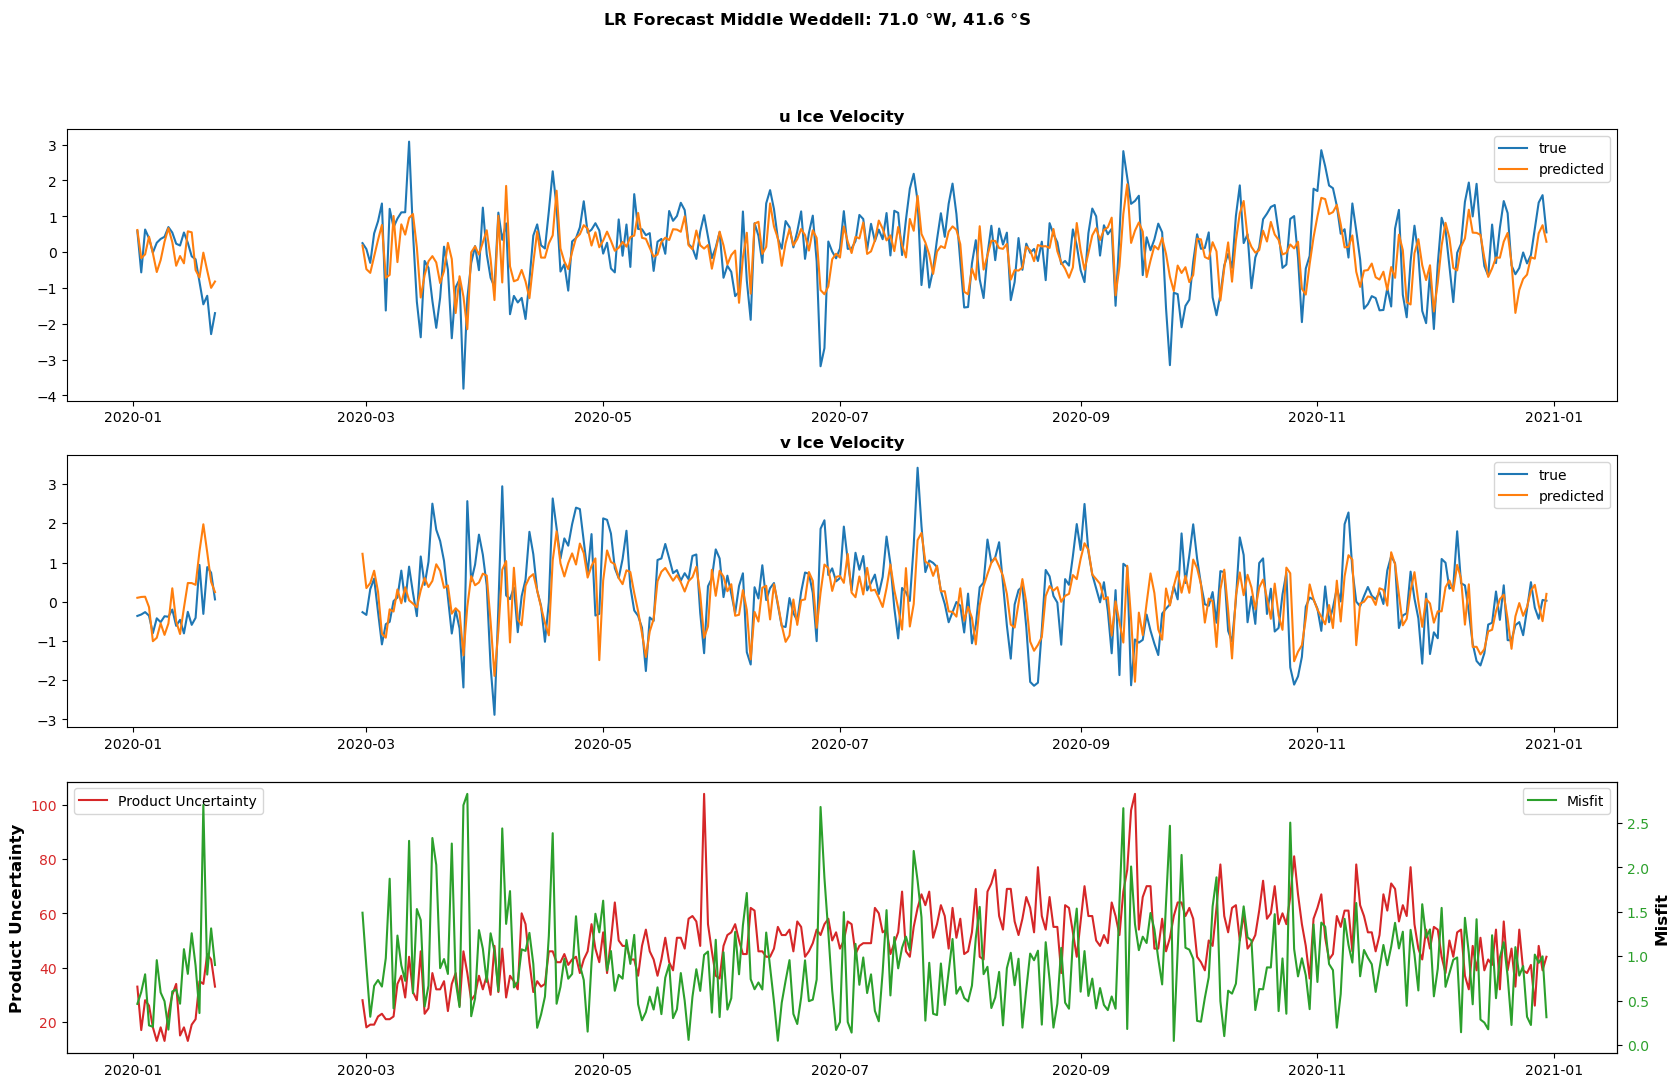

In [13]:
y = 40
x = 200

region = 'Middle Weddell'

if lat[y] < 0:
    lat_str = r'$\degree $W'
else:
    lat_str = r'$\degree $E'
    
lon_str = r'$ \degree $S'

fig, axs = plt.subplots(nrows = 3, ncols = 1, figsize = (20, 12))

plt1 = axs[0].plot(time[-365:],lr_u_true[-365:,y,x], label = 'true')
plt2 = axs[0].plot(time[-365:],lr_u_pred[-365:,y,x], label = 'predicted')
axs[0].legend()
axs[0].set_title('u Ice Velocity', fontweight = 'bold')

plt3 = axs[1].plot(time[-365:],lr_v_true[-365:,y,x], label = 'true')
plt4 = axs[1].plot(time[-365:],lr_v_pred[-365:,y,x], label = 'predicted')
axs[1].legend()
axs[1].set_title('v Ice Velocity', fontweight = 'bold')

plt5 = axs[2].plot(time[-365:],error[-365:,y,x], label = 'Product Uncertainty', color = 'tab:red')
axs[2].set_ylabel('Product Uncertainty', fontsize = '12', fontweight = 'bold')
axs[2].tick_params(axis='y', labelcolor = 'tab:red')
axs[2].legend(loc = 'upper left')

twin = axs[2].twinx()
plt5 = twin.plot(time[-365:],misfit[-365:,y,x], label = 'Misfit', color = 'tab:green')
twin.set_ylabel('Misfit', fontsize = '12', fontweight = 'bold')
twin.legend(loc = 'upper right')
twin.tick_params(axis='y', labelcolor = 'tab:green')



fig.suptitle(f'LR Forecast {region}: {np.abs(lat[y]):.1f} {lat_str}, {np.abs(lon[x]):.1f} {lon_str}', fontweight = 'bold')

plt.show()

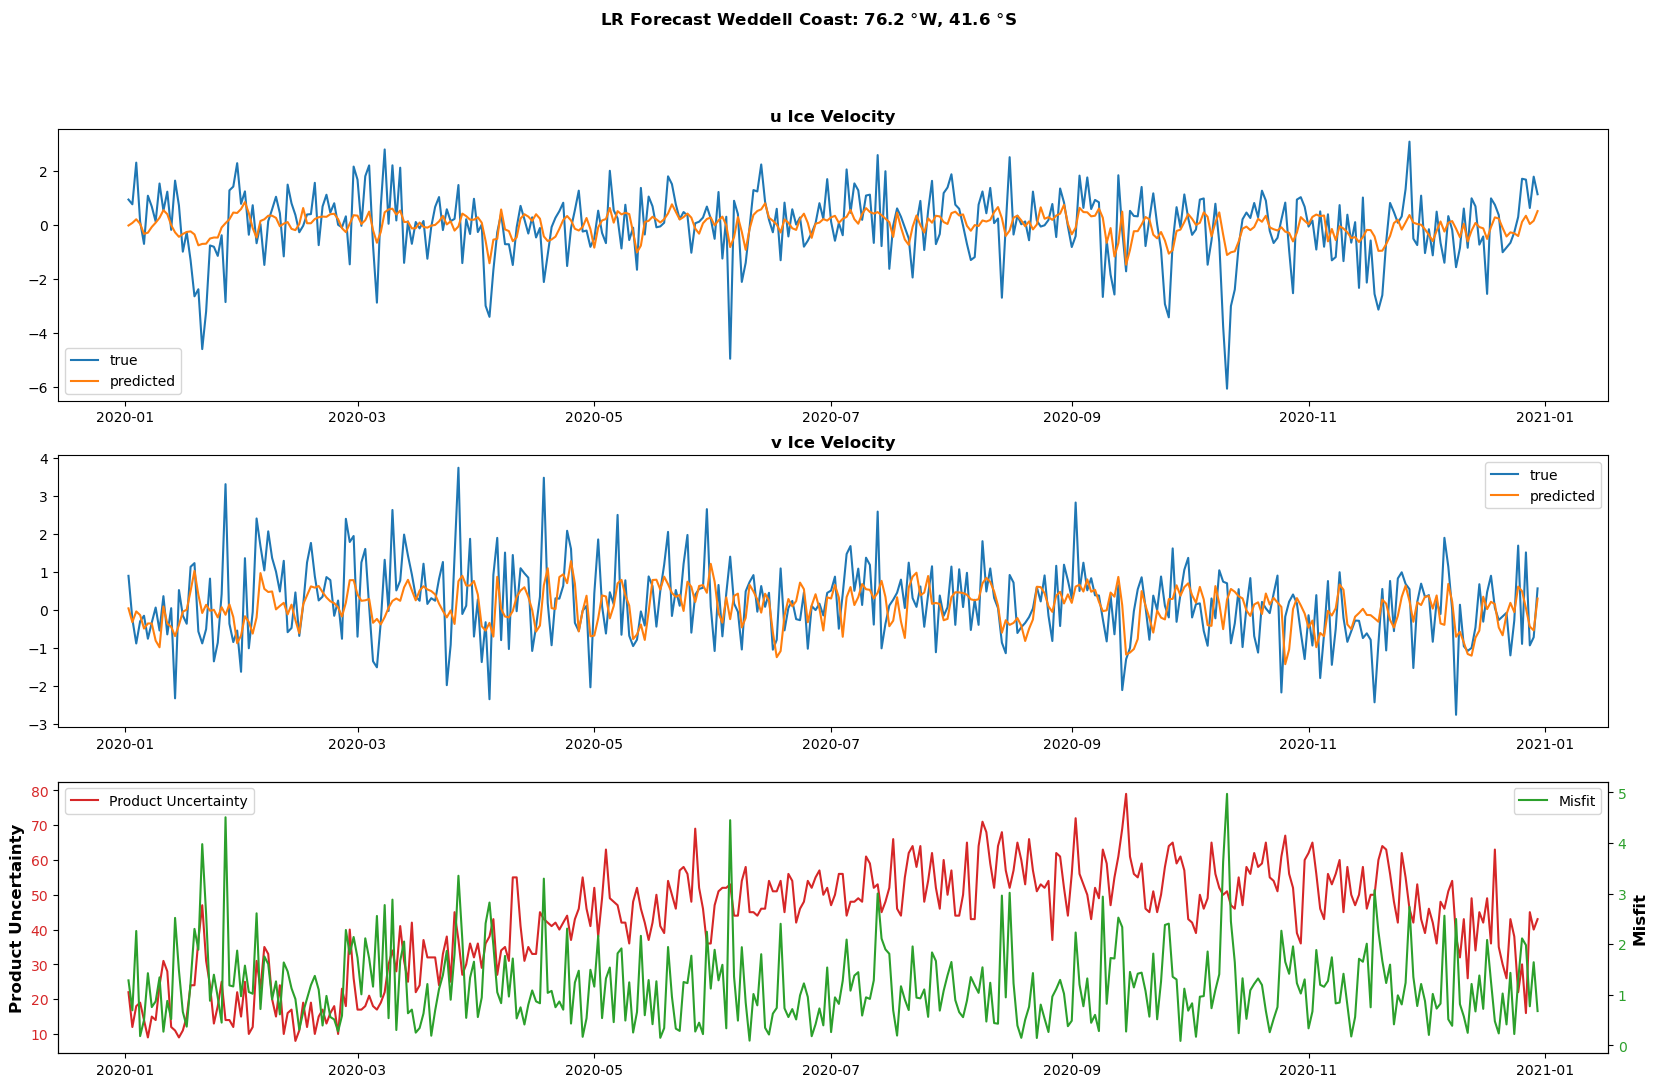

In [14]:
y = 17
x = 200
region = 'Weddell Coast'

if lat[y] < 0:
    lat_str = r'$\degree $W'
else:
    lat_str = r'$\degree $E'
    
lon_str = r'$ \degree $S'

fig, axs = plt.subplots(nrows = 3, ncols = 1, figsize = (20, 12))

plt1 = axs[0].plot(time[-365:],lr_u_true[-365:,y,x], label = 'true')
plt2 = axs[0].plot(time[-365:],lr_u_pred[-365:,y,x], label = 'predicted')
axs[0].legend()
axs[0].set_title('u Ice Velocity', fontweight = 'bold')

plt3 = axs[1].plot(time[-365:],lr_v_true[-365:,y,x], label = 'true')
plt4 = axs[1].plot(time[-365:],lr_v_pred[-365:,y,x], label = 'predicted')
axs[1].legend()
axs[1].set_title('v Ice Velocity', fontweight = 'bold')

plt5 = axs[2].plot(time[-365:],error[-365:,y,x], label = 'Product Uncertainty', color = 'tab:red')
axs[2].set_ylabel('Product Uncertainty', fontsize = '12', fontweight = 'bold')
axs[2].tick_params(axis='y', labelcolor = 'tab:red')
axs[2].legend(loc = 'upper left')

twin = axs[2].twinx()
plt5 = twin.plot(time[-365:],misfit[-365:,y,x], label = 'Misfit', color = 'tab:green')
twin.set_ylabel('Misfit', fontsize = '12', fontweight = 'bold')
twin.legend(loc = 'upper right')
twin.tick_params(axis='y', labelcolor = 'tab:green')



fig.suptitle(f'LR Forecast {region}: {np.abs(lat[y]):.1f} {lat_str}, {np.abs(lon[x]):.1f} {lon_str}', fontweight = 'bold')

plt.show()

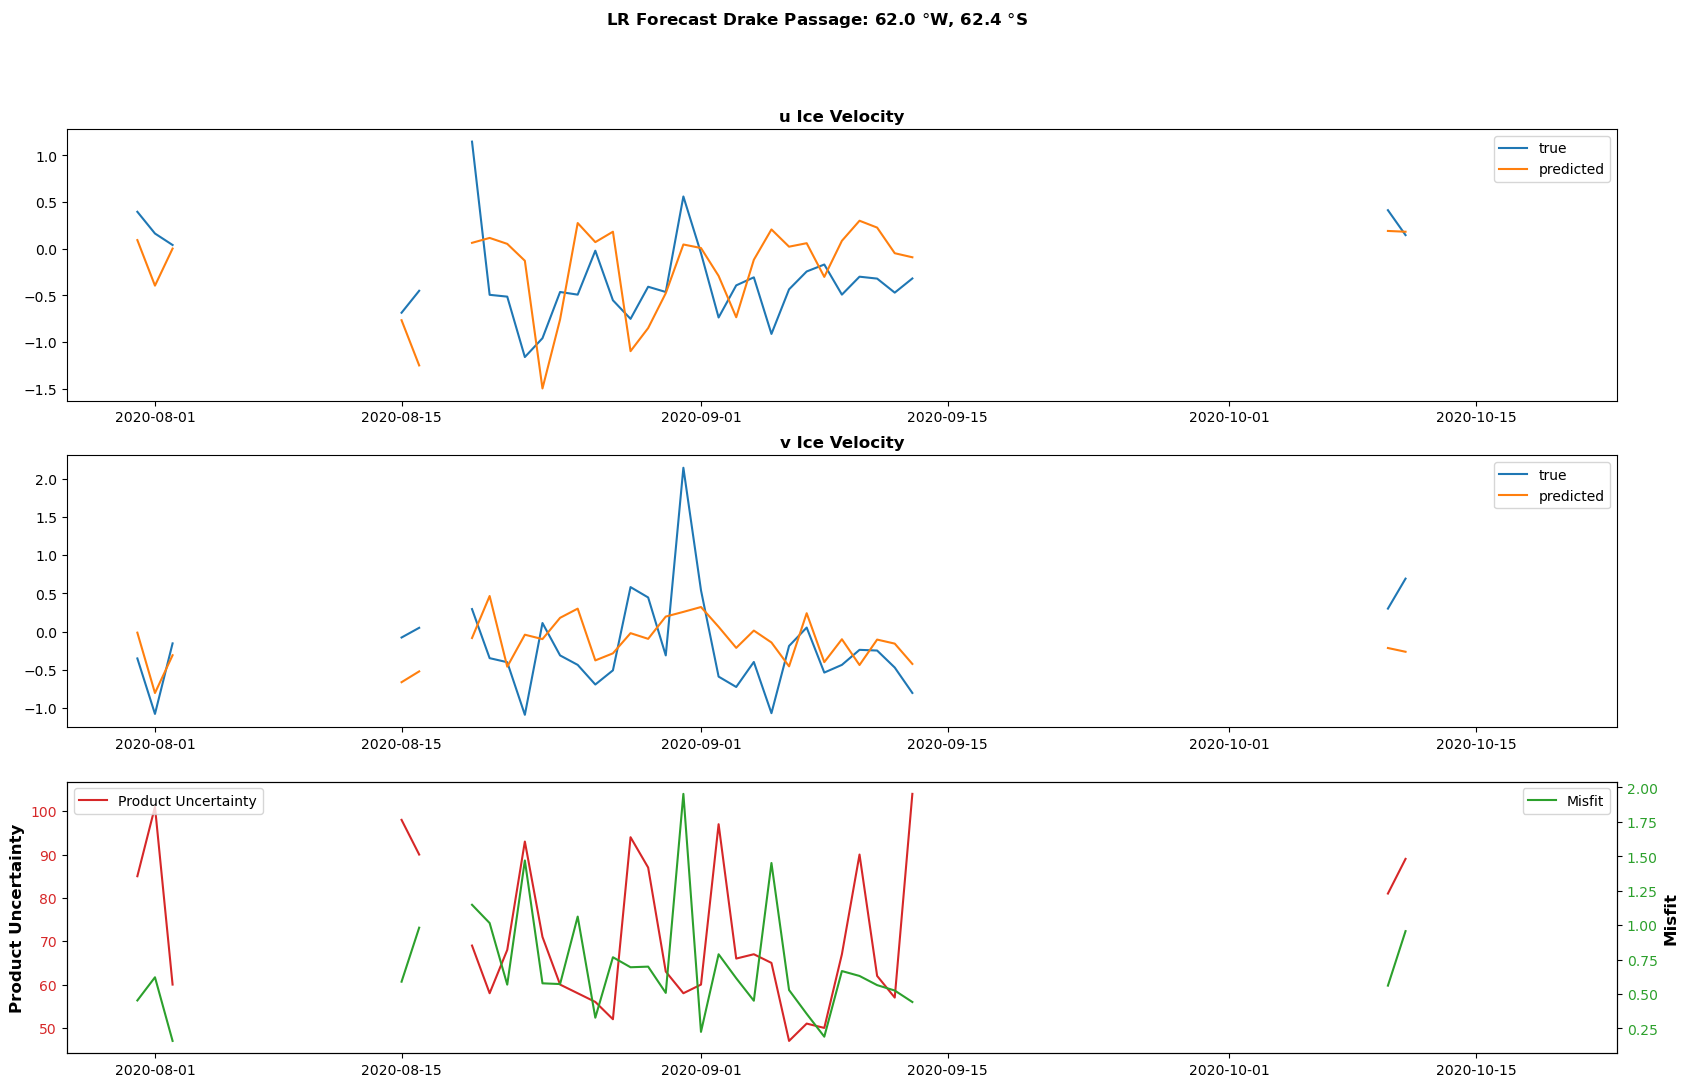

In [15]:
y = 80
x = 170
region = 'Drake Passage'

if lat[y] < 0:
    lat_str = r'$\degree $W'
else:
    lat_str = r'$\degree $E'
    
lon_str = r'$ \degree $S'

fig, axs = plt.subplots(nrows = 3, ncols = 1, figsize = (20, 12))

plt1 = axs[0].plot(time[-365:],lr_u_true[-365:,y,x], label = 'true')
plt2 = axs[0].plot(time[-365:],lr_u_pred[-365:,y,x], label = 'predicted')
axs[0].legend()
axs[0].set_title('u Ice Velocity', fontweight = 'bold')

plt3 = axs[1].plot(time[-365:],lr_v_true[-365:,y,x], label = 'true')
plt4 = axs[1].plot(time[-365:],lr_v_pred[-365:,y,x], label = 'predicted')
axs[1].legend()
axs[1].set_title('v Ice Velocity', fontweight = 'bold')

plt5 = axs[2].plot(time[-365:],error[-365:,y,x], label = 'Product Uncertainty', color = 'tab:red')
axs[2].set_ylabel('Product Uncertainty', fontsize = '12', fontweight = 'bold')
axs[2].tick_params(axis='y', labelcolor = 'tab:red')
axs[2].legend(loc = 'upper left')

twin = axs[2].twinx()
plt5 = twin.plot(time[-365:],misfit[-365:,y,x], label = 'Misfit', color = 'tab:green')
twin.set_ylabel('Misfit', fontsize = '12', fontweight = 'bold')
twin.legend(loc = 'upper right')
twin.tick_params(axis='y', labelcolor = 'tab:green')



fig.suptitle(f'LR Forecast {region}: {np.abs(lat[y]):.1f} {lat_str}, {np.abs(lon[x]):.1f} {lon_str}', fontweight = 'bold')

plt.show()

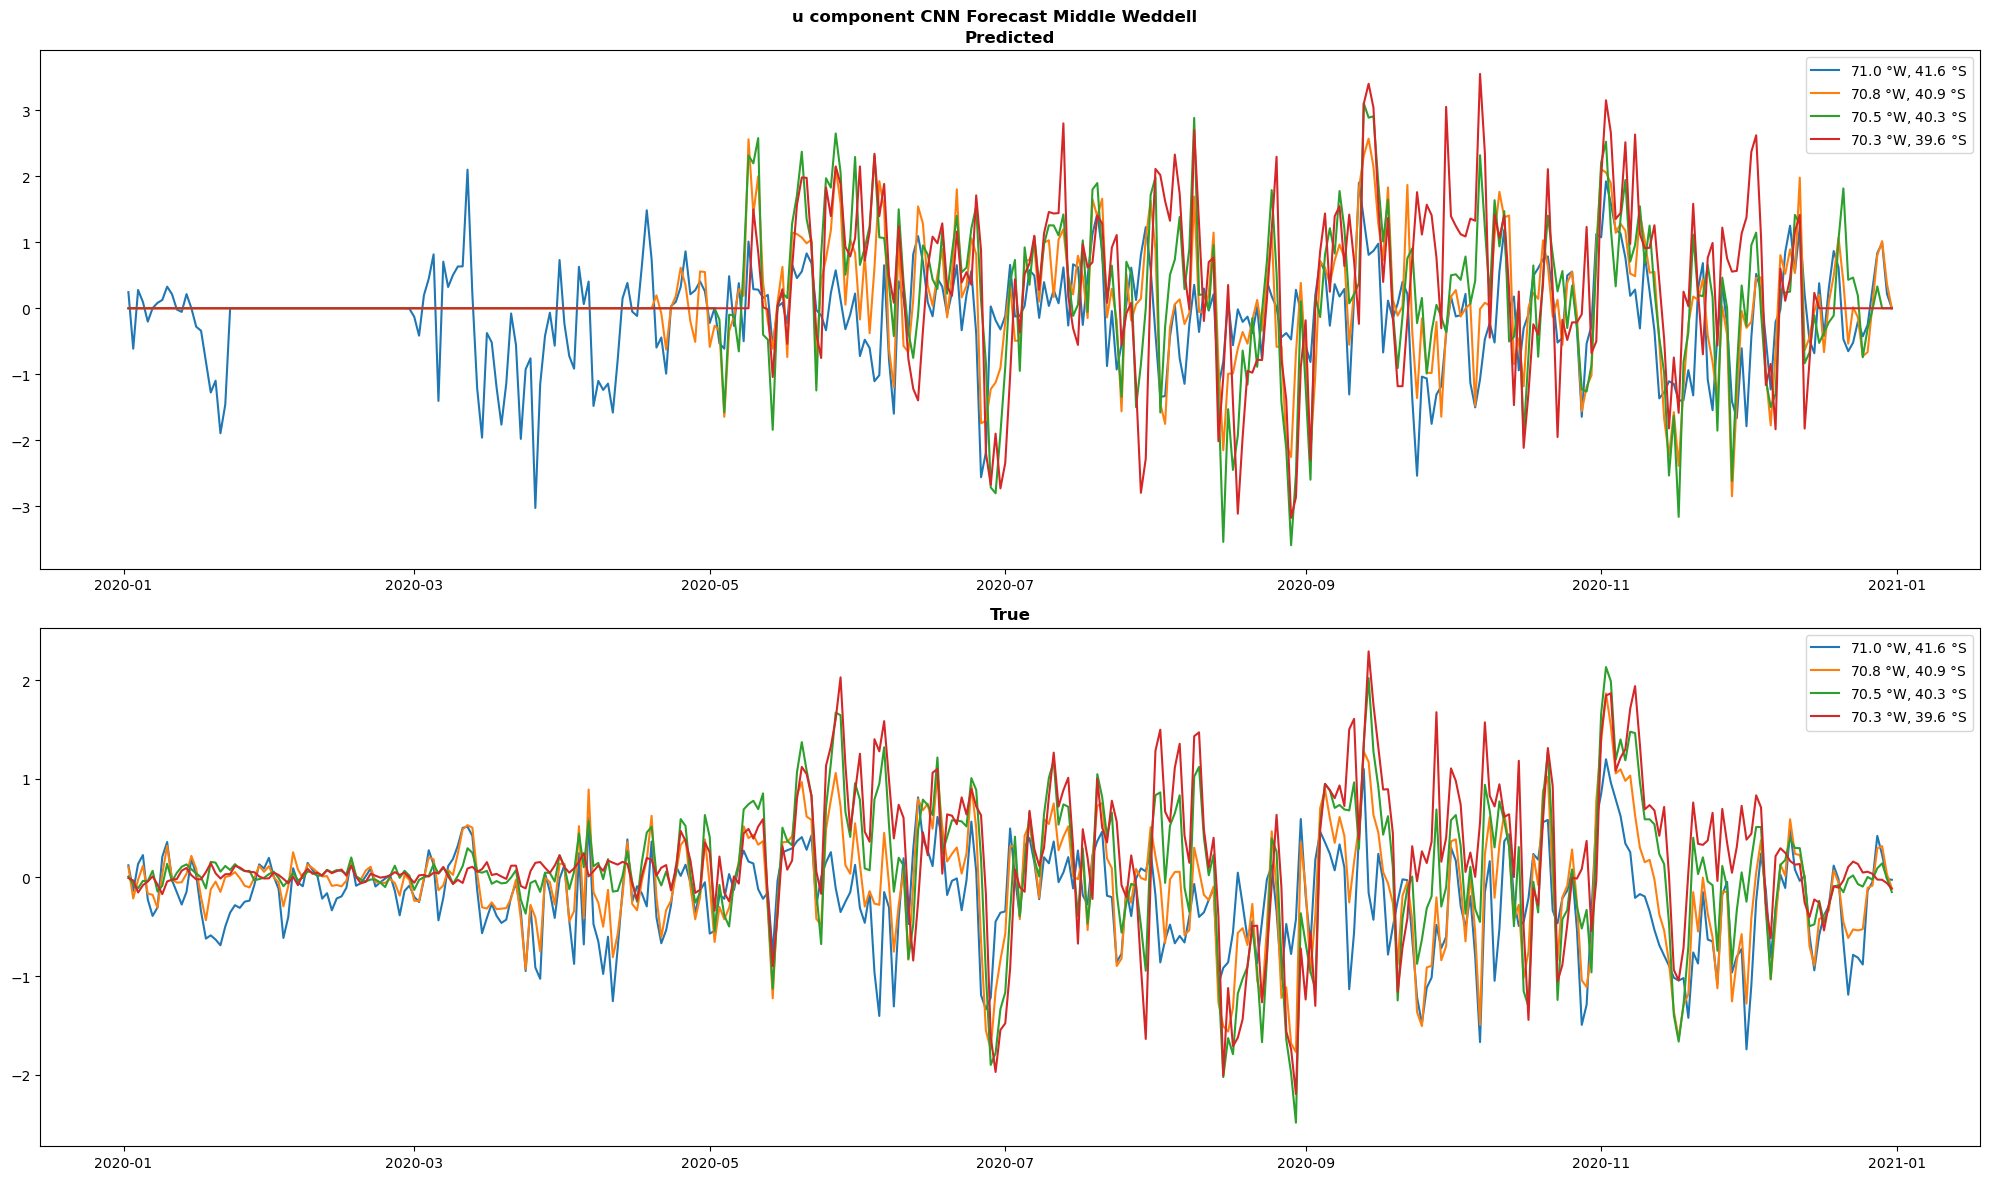

In [34]:
y = 40
x = 200

region = 'Middle Weddell'

if lat[y] < 0:
    lat_str = r'$\degree $W'
else:
    lat_str = r'$\degree $E'
    
lon_str = r'$ \degree $S'

fig, axs = plt.subplots(nrows = 2, ncols = 1, figsize = (20, 12))

for i in range (0,4):
    plt1 = axs[0].plot(time[-365:],cnn_u_true[-365:, y + (i * 10), x + (i * 10)], label = f'{np.abs(lat[y+i]):.1f} {lat_str}, {np.abs(lon[x+i]):.1f} {lon_str}')
    axs[0].set_title('Predicted', fontweight = 'bold')
    

axs[0].legend()
    
for i in range (0,4):
    plt2 = axs[1].plot(time[-365:],cnn_u_pred[-365:, y + (i * 10), x + (i * 10)], label = f'{np.abs(lat[y+i]):.1f} {lat_str}, {np.abs(lon[x+i]):.1f} {lon_str}')
    axs[1].set_title('True', fontweight = 'bold')

axs[1].legend()

fig.suptitle(f'u component CNN Forecast {region}', fontweight = 'bold')
fig.tight_layout()

plt.show()

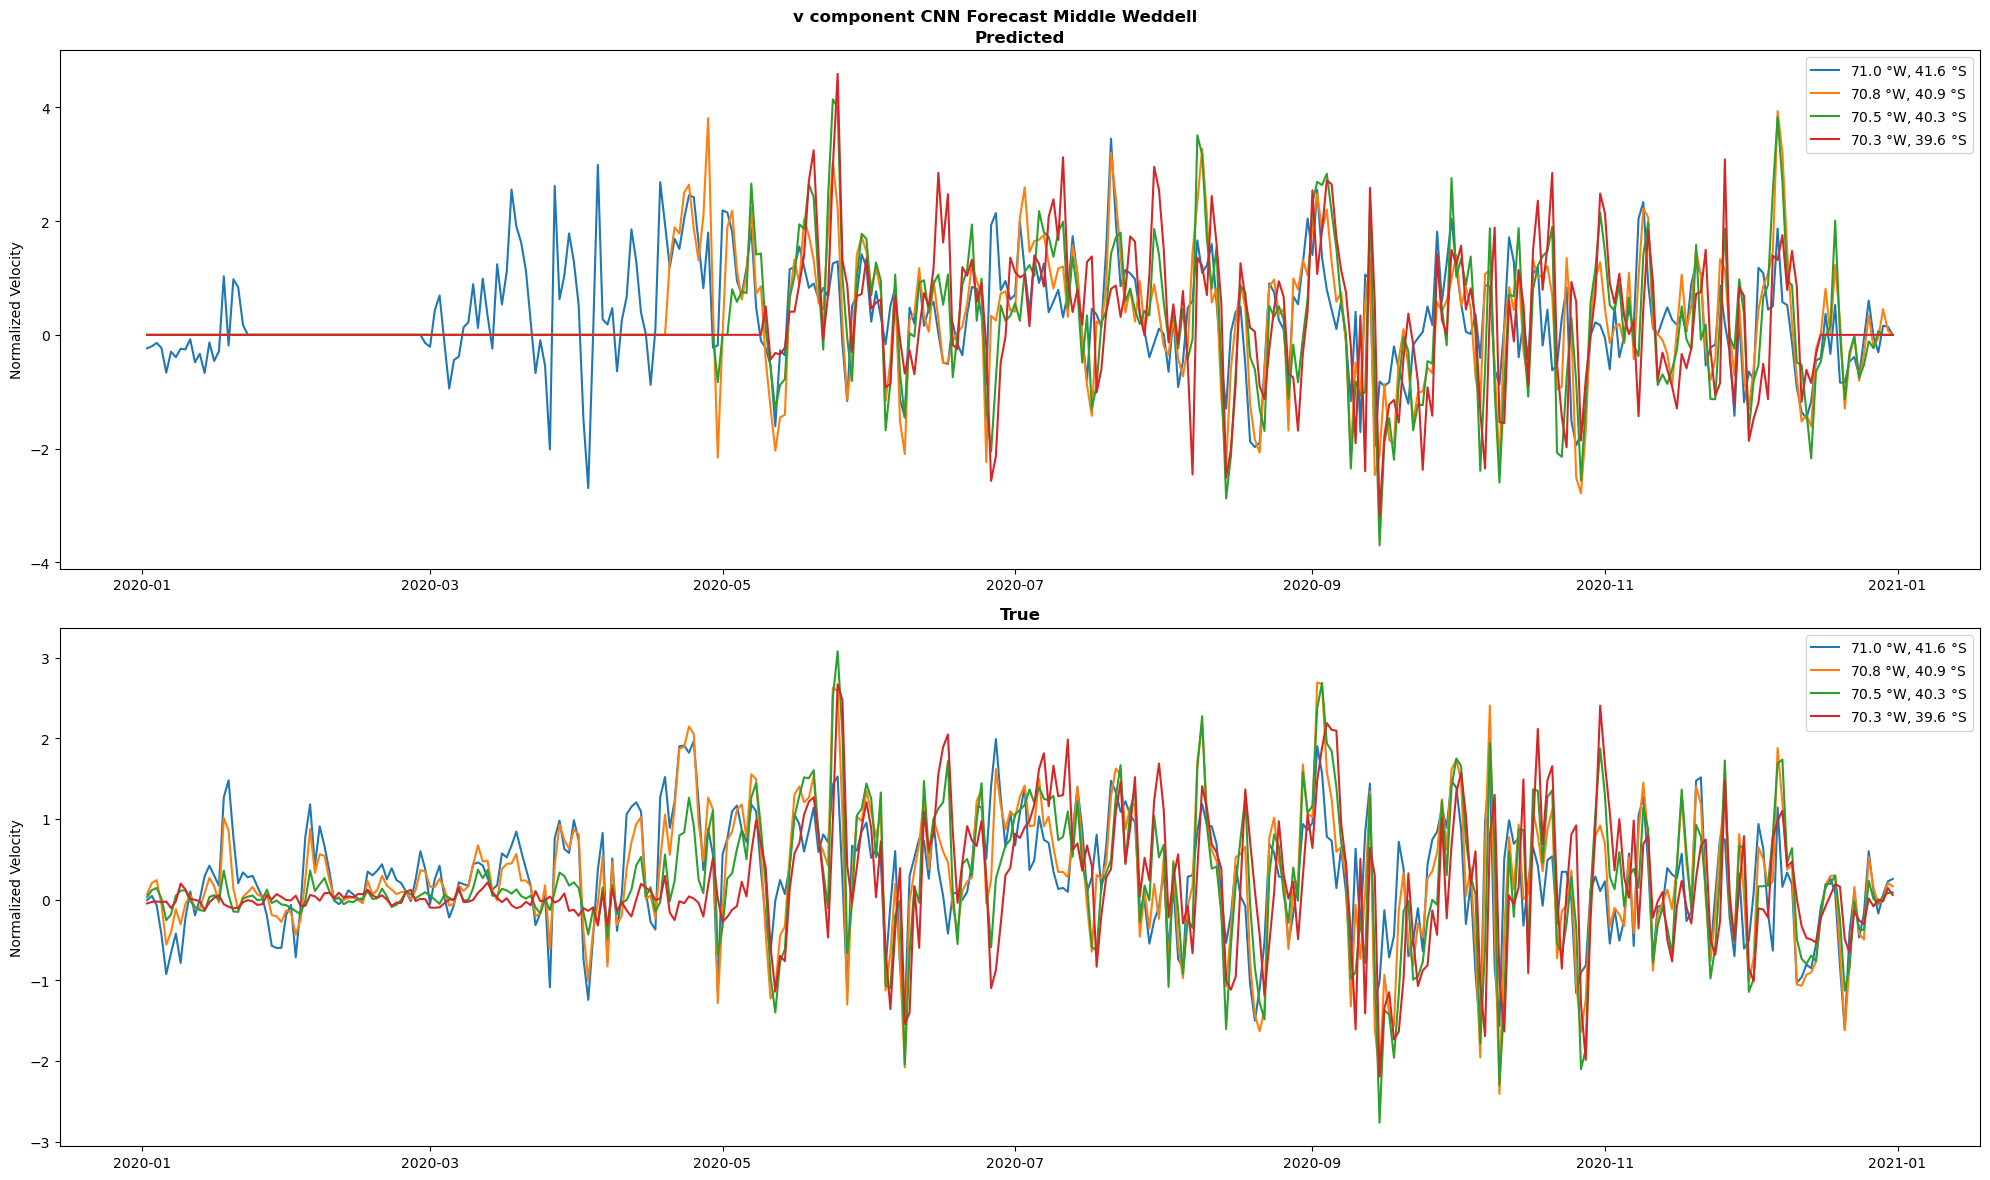

In [35]:
y = 40
x = 200

region = 'Middle Weddell'

if lat[y] < 0:
    lat_str = r'$\degree $W'
else:
    lat_str = r'$\degree $E'
    
lon_str = r'$ \degree $S'

fig, axs = plt.subplots(nrows = 2, ncols = 1, figsize = (20, 12))

for i in range (0,4):
    plt1 = axs[0].plot(time[-365:],cnn_v_true[-365:, y + (i * 10), x + (i * 10)], label = f'{np.abs(lat[y+i]):.1f} {lat_str}, {np.abs(lon[x+i]):.1f} {lon_str}')
    
axs[0].legend()
axs[0].set_title('Predicted', fontweight = 'bold')
axs[0].set_ylabel('Normalized Velocity')
    
for i in range (0,4):
    plt2 = axs[1].plot(time[-365:],cnn_v_pred[-365:, y + (i * 10), x + (i * 10)], label = f'{np.abs(lat[y+i]):.1f} {lat_str}, {np.abs(lon[x+i]):.1f} {lon_str}')

axs[1].legend()
axs[1].set_title('True', fontweight = 'bold')
axs[1].set_ylabel('Normalized Velocity')

fig.suptitle(f'v component CNN Forecast {region}', fontweight = 'bold')
fig.tight_layout()

plt.show()

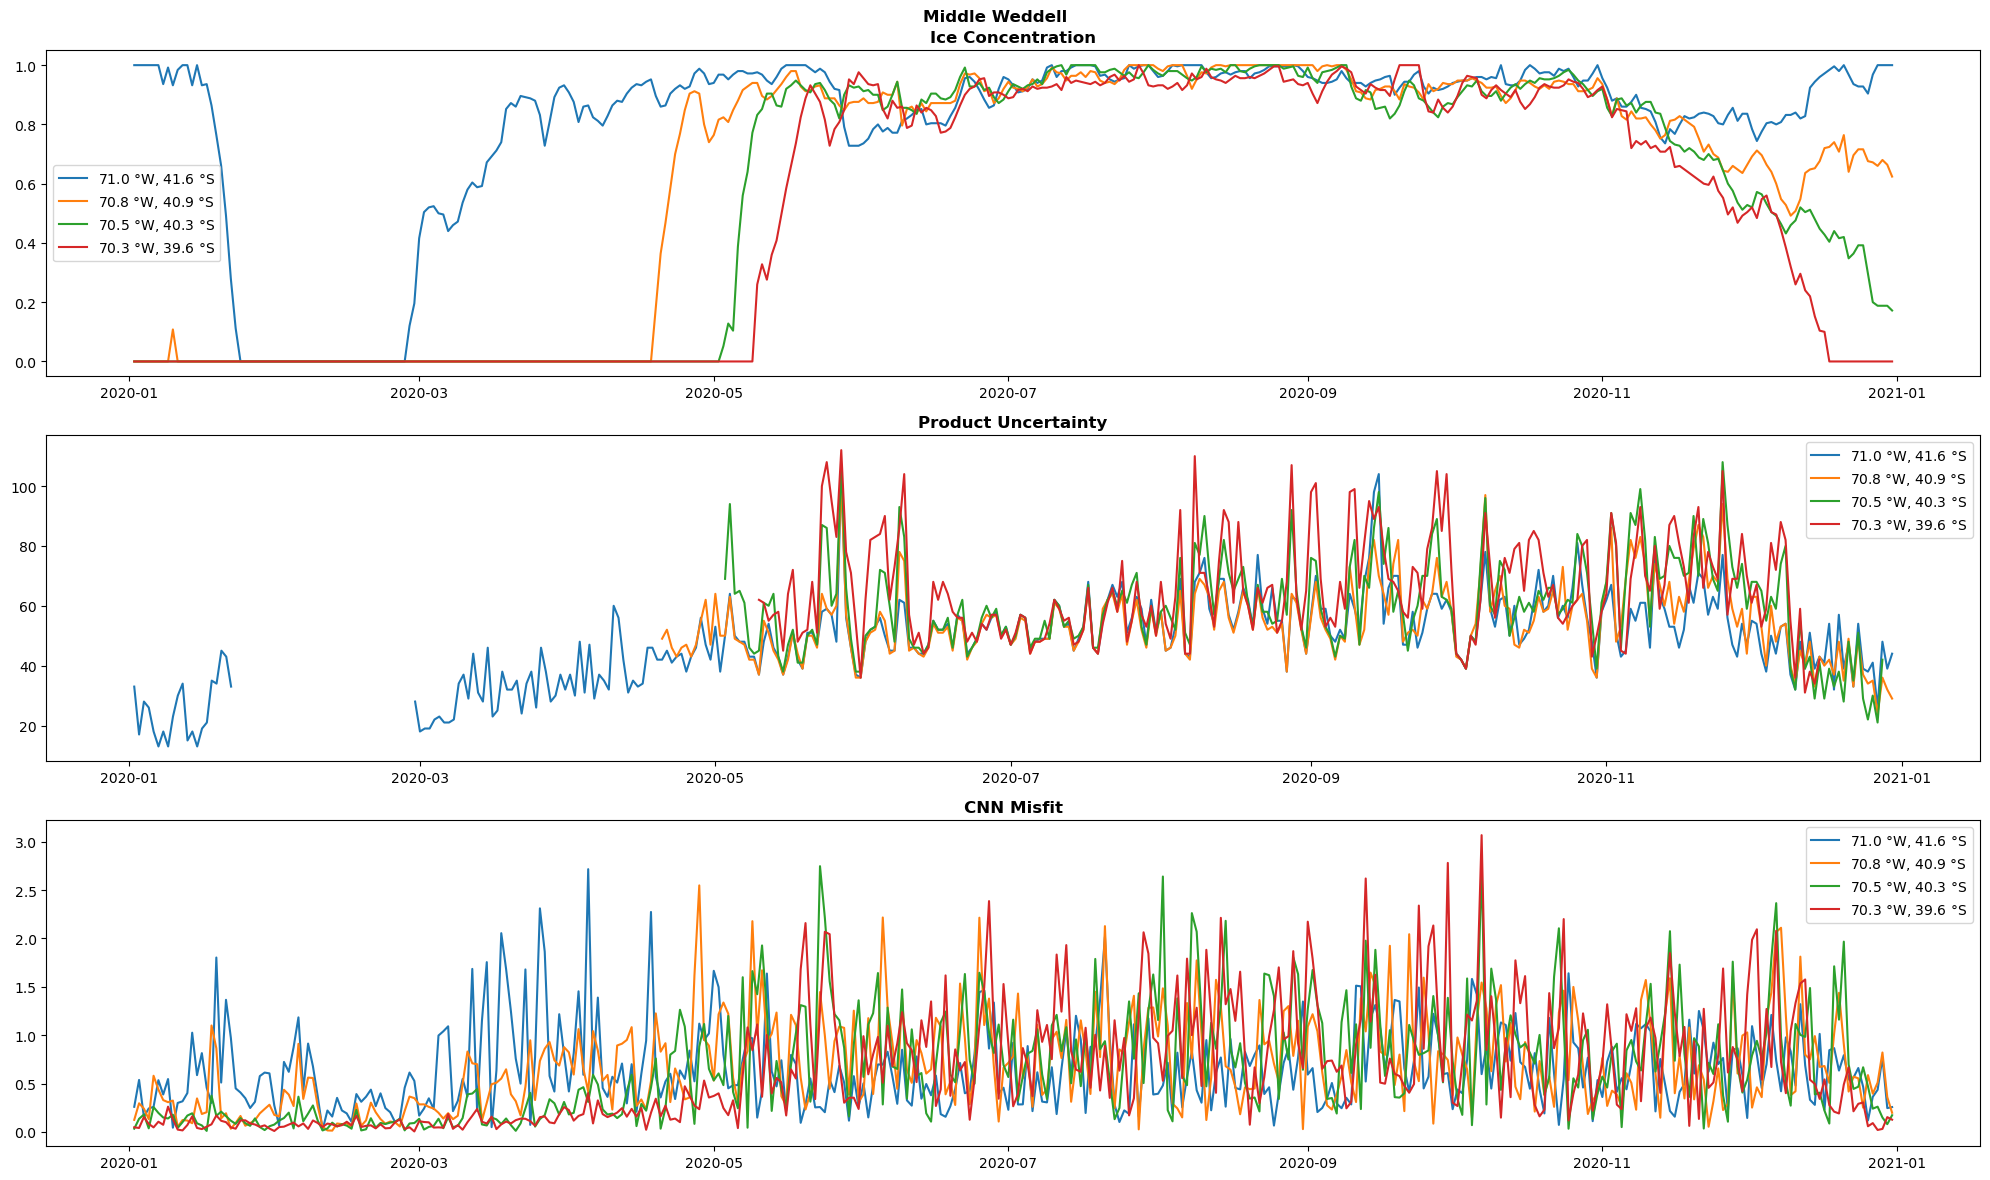

In [39]:
y = 40
x = 200

region = 'Middle Weddell'

if lat[y] < 0:
    lat_str = r'$\degree $W'
else:
    lat_str = r'$\degree $E'
    
lon_str = r'$ \degree $S'

fig, axs = plt.subplots(nrows = 3, ncols = 1, figsize = (20, 12))

for i in range (0,4):
    plt1 = axs[0].plot(time[-365:],ic[-365:, y + (i * 10), x + (i * 10)], label = f'{np.abs(lat[y+i]):.1f} {lat_str}, {np.abs(lon[x+i]):.1f} {lon_str}')

axs[0].set_title('Ice Concentration', fontweight = 'bold')
    

axs[0].legend()
    
for i in range (0,4):
    plt2 = axs[1].plot(time[-365:],error[-365:, y + (i * 10), x + (i * 10)], label = f'{np.abs(lat[y+i]):.1f} {lat_str}, {np.abs(lon[x+i]):.1f} {lon_str}')

axs[1].set_title('Product Uncertainty', fontweight = 'bold')

axs[1].legend()

for i in range (0,4):
    plt2 = axs[2].plot(time[-365:],misfit_cnn[-365:, y + (i * 10), x + (i * 10)], label = f'{np.abs(lat[y+i]):.1f} {lat_str}, {np.abs(lon[x+i]):.1f} {lon_str}')

axs[2].set_title('CNN Misfit', fontweight = 'bold')

axs[2].legend()

fig.suptitle(f'{region}', fontweight = 'bold')
fig.tight_layout()

plt.show()

(89595558,)


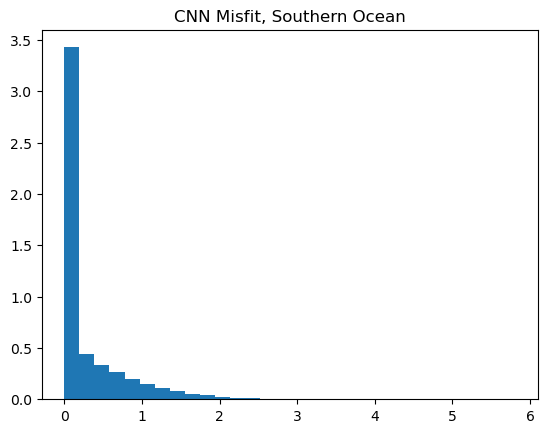

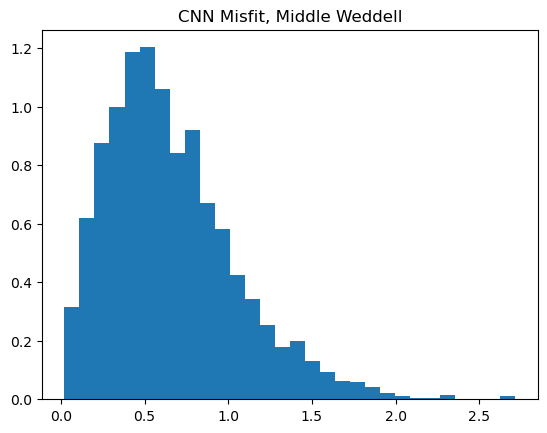

In [74]:
misfit_cnn_all = misfit_cnn.flatten()



print(np.shape(misfit_cnn_all))

plt.hist(misfit_cnn_all, bins = 30, density = 'true', stacked = 'true')
plt.title("CNN Misfit, Southern Ocean")
plt.show()

plt.hist(misfit_cnn[:, 40, 200],  bins = 30, density = 'true', stacked = 'true')
plt.title("CNN Misfit, Middle Weddell")
plt.show()

(89595558,)


NameError: name 'misfit_cnn_weddell' is not defined

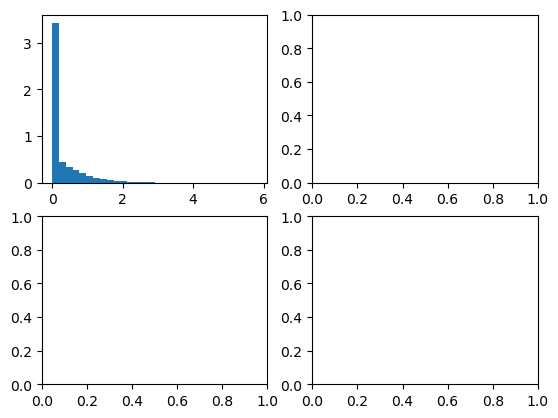

In [73]:
ilon_weddell = np.where((lon>= -70) & (lon<= 0))[0]
nlon = len(ilon_weddell)

ilat_weddell = np.where((lat>= -80) & (lat<= -62))[0]
nlat = len(ilat_weddell)

# nlat = np.shape(ic)[1]
# nlon = np.shape(ic)[2]
# ntime = len(time)

# misfit_all = np.reshape(misfit_cnn(nlon * nlat * ntime))

misfit_cnn_all = misfit_cnn.flatten()

# misfit_cnn_weddell = misfit_cnn[np.ix_(ilat_weddell, ilon_weddell)]
# misfit_cnn_weddell = misfit_cnn_weddell.flatten()

fig, axs = plt.subplots(nrows = 2, ncols = 2)


print(np.shape(misfit_cnn_all))

plt1 = axs[0,0].hist(misfit_cnn_all, bins = 30, density = 'true', stacked = 'true')

plt2 = axs[0,1].hist(misfit_cnn_weddell, bins = 30, density = 'true', stacked = 'true')

plt3 = axs[1,0].hist(misfit_cnn[:, 40, 200],  bins = 30, density = 'true', stacked = 'true')

plt.show()

### Smoothed Linear Regression Error and Polar Pathfinder Product Uncertainty ###

In [51]:
nt = len(time)
print(nt)

# sum all of the days 
# / 365.25

days = 365.25 # days per year, *** NOT accounting for leap years in data ***
ny = int(len(u_true))

nlat = len(lat)
nlon = len(lon)

def daily_mean(data):
    data_reshaped = data.reshape(ny, nlat, nlon)
    daily_mean = np.nan_mean(data_reshaped, axis = 0)

lr_u_true_mean = daily_mean(lr_u_true)

10593


NameError: name 'u_true' is not defined

In [49]:
year = time.astype('datetime64[Y]').astype(int) + 1970

days_per_year = 366 if calendar.isleap(year) else 365

np.shape(days_of_year)

daily_mean = np.zeros((366, nlat, nlon))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [50]:
###Leap Year ### 
def isleap(year):
    """Return True for leap years, False for non-leap years."""
    return year % 4 == 0 and (year % 100 != 0 or year % 400 == 0)

/tmp/ipykernel_3360962/3683421512.py:1: RuntimeWarning: Mean of empty slice
  mean_error = np.nanmean(error, axis = 0)
/tmp/ipykernel_3360962/3683421512.py:6: RuntimeWarning: Mean of empty slice
  mean_big_error = np.nanmean(big_error, axis = 0)


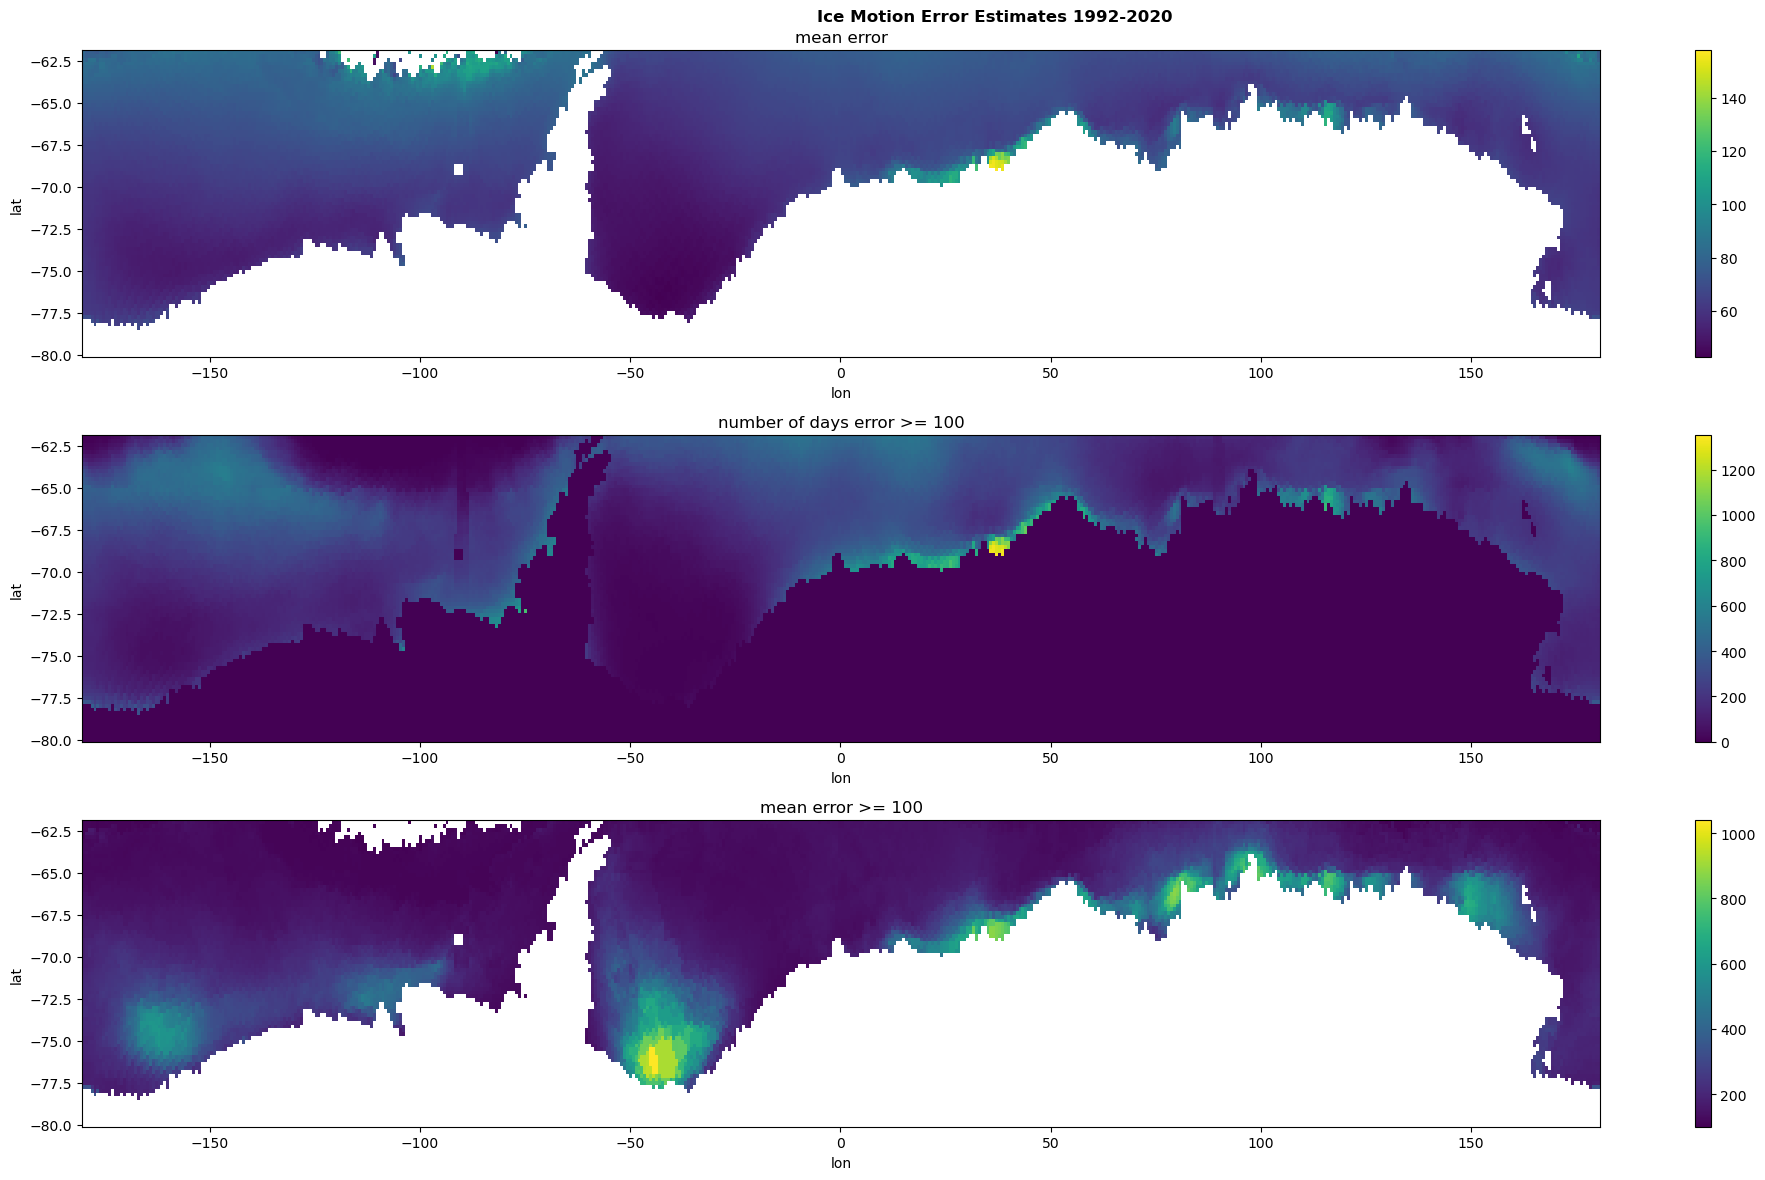

In [60]:
mean_error = np.nanmean(error, axis = 0)

big_error_days = np.sum(error >= 100, axis = 0) 

big_error = np.where(error >= 100, error, np.nan)
mean_big_error = np.nanmean(big_error, axis = 0) 

cmap = 'RdBu'
norm = TwoSlopeNorm(vcenter = 0)

# Plot difference (southern ocean)
fig, axs = plt.subplots(nrows = 3, ncols = 1, figsize = (20, 12))

plt0 = axs[0].pcolormesh(lon, lat, mean_error)
fig.colorbar(plt0, ax = axs[0])
axs[0].set_title(r'mean error')
axs[0].set_xlabel('lon')
axs[0].set_ylabel('lat')

plt1 = axs[1].pcolormesh(lon, lat, big_error_days)
fig.colorbar(plt1, ax = axs[1])
axs[1].set_title(r'number of days error >= 100')
axs[1].set_xlabel('lon')
axs[1].set_ylabel('lat')

plt2 = axs[2].pcolormesh(lon, lat, mean_big_error)
fig.colorbar(plt2, ax = axs[2])
axs[2].set_title(r'mean error >= 100')
axs[2].set_xlabel('lon')
axs[2].set_ylabel('lat')

fig.suptitle(f'Ice Motion Error Estimates 1992-2020', fontweight = 'bold')
fig.tight_layout()


plt.show()

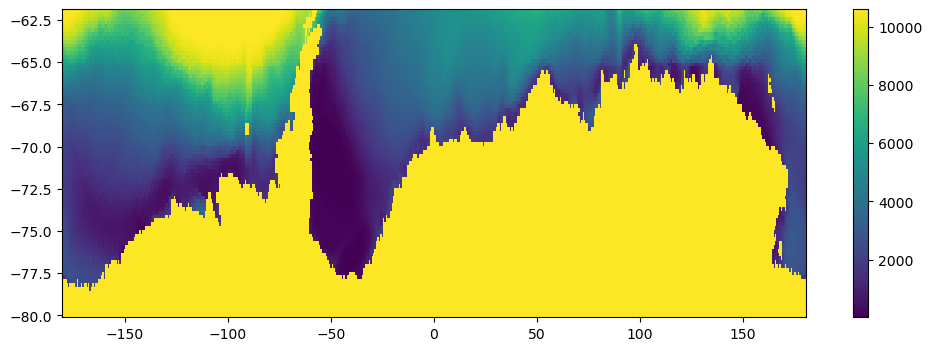

In [71]:
days_nan = np.nansum(np.isnan(ui), axis = 0)

plt.figure(figsize = (12,4))
plt.pcolormesh(lon, lat, days_nan)
plt.colorbar()

In [76]:
print(np.where(np.round(ui) == 1))
print(np.where(vi == -9999))
print(np.where(error == -9999))

(array([    0,     0,     0, ..., 10591, 10591, 10591]), array([15, 15, 16, ..., 80, 80, 80]), array([193, 195, 188, ..., 210, 211, 212]))
(array([], dtype=int64), array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64), array([], dtype=int64))
